In [1]:
%pdb
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from os.path import join, basename, splitext

Automatic pdb calling has been turned ON


In [2]:
exp = 'poet_v12'

In [ ]:
test_agent = 'r0.0.p0_0.8.b1_0_0.4_m_1.094246_0.85056704_1.094246_0.85056704_1.094246_0.85056704_1.094246_0.85056704'

In [5]:
log_dir = join('logs', exp)
log_files = glob(join(log_dir, '*.log'))
parent_dict = {}
scores = defaultdict(list)
for log_file in log_files:
    data = pd.read_csv(log_file, header=0)
    this = splitext(basename(log_file))[0].split(exp+'.')[1]
    parent = data['parent'][0]
    parent_dict[this] = parent
    scores[this].append(data['iteration'].to_numpy())
    scores[this].append(data['score'].to_numpy())

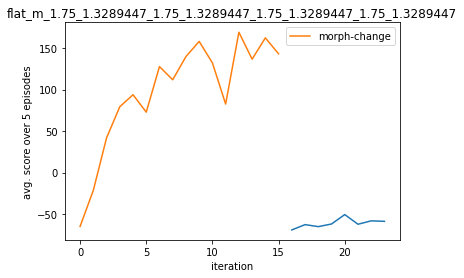

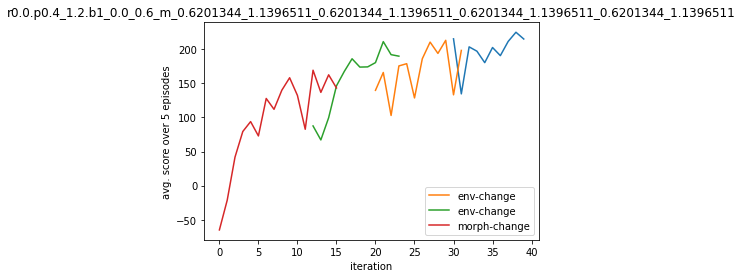

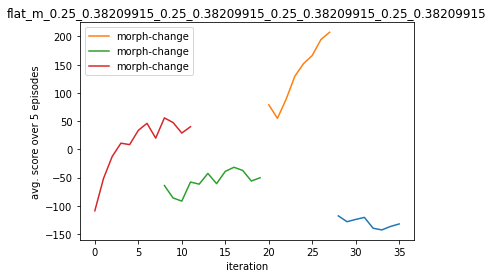

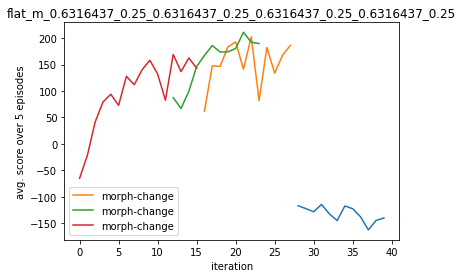

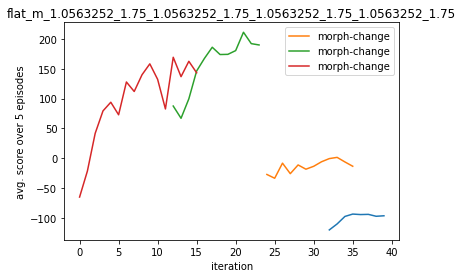

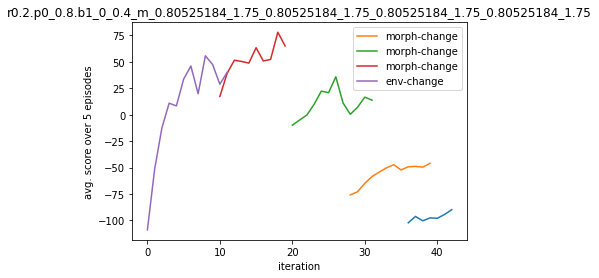

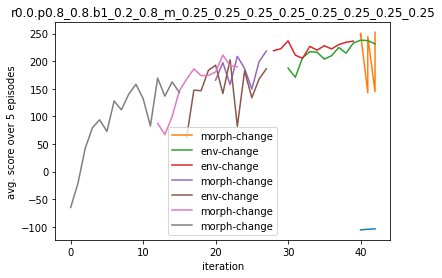

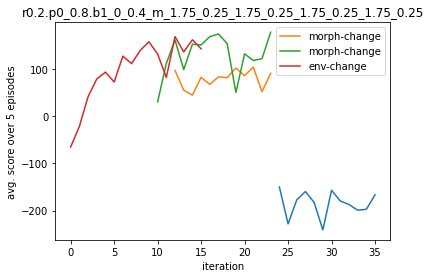

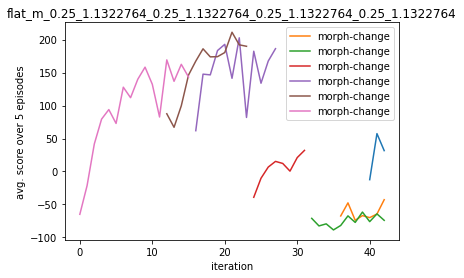

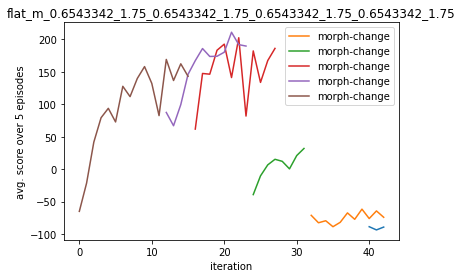

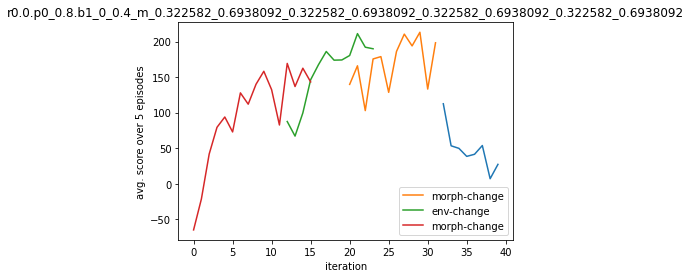

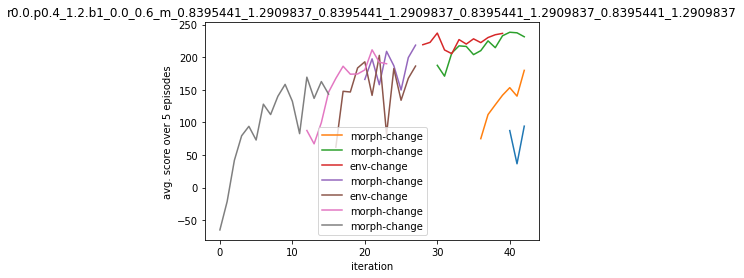

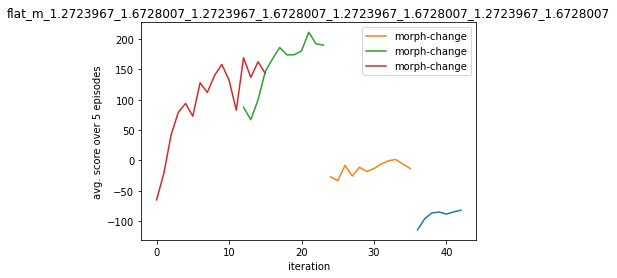

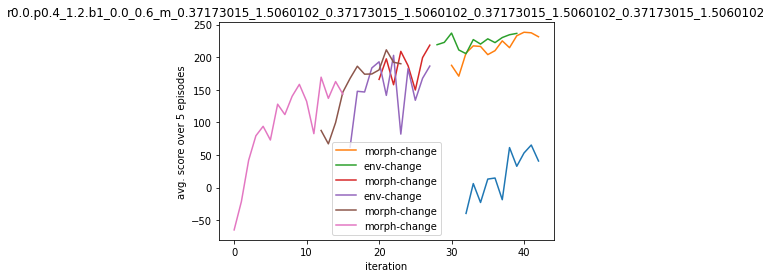

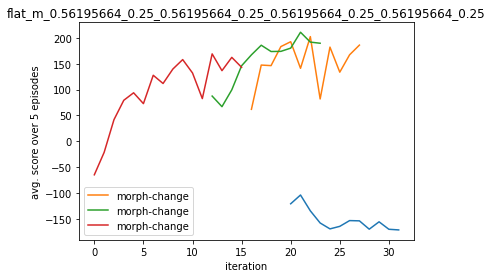

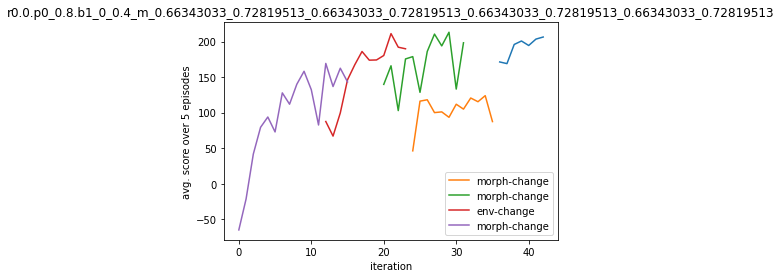

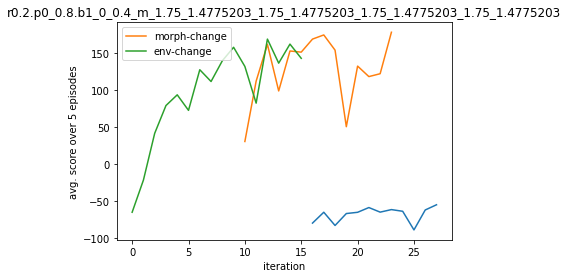

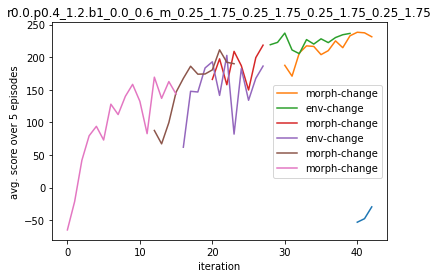

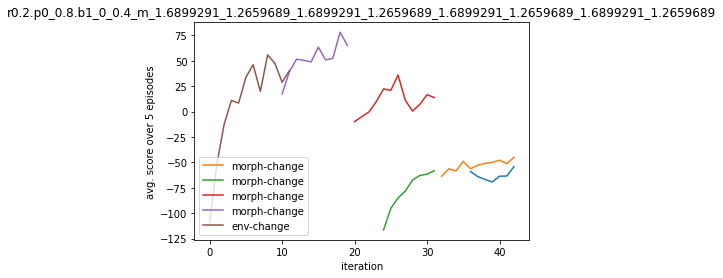

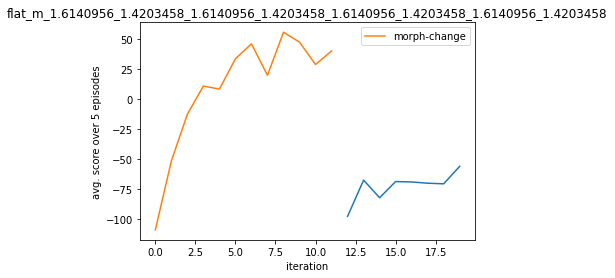

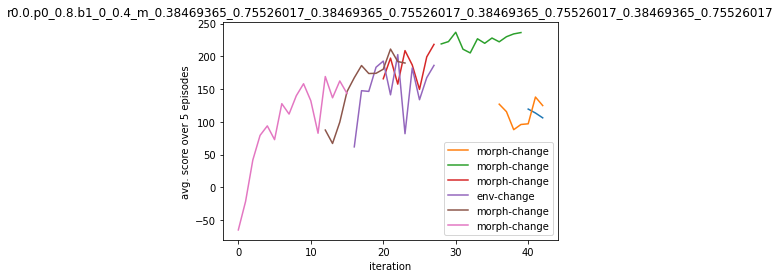

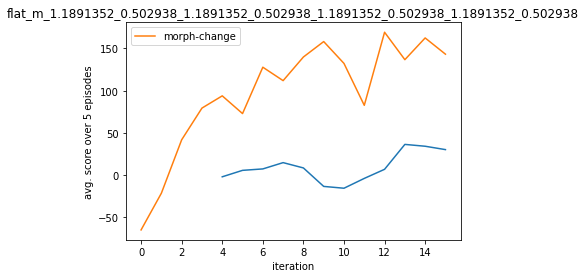

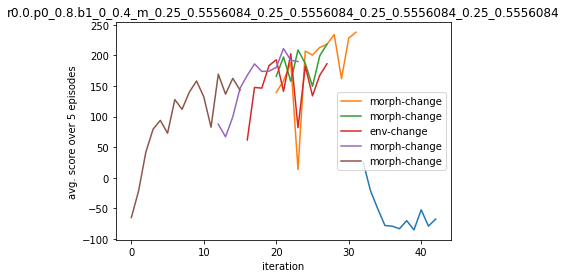

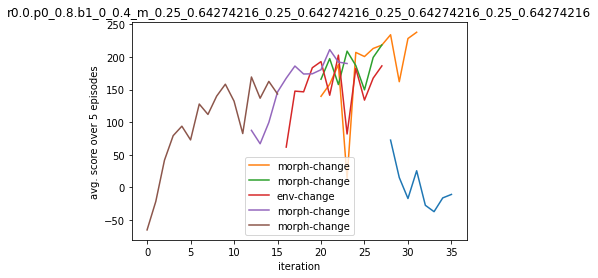

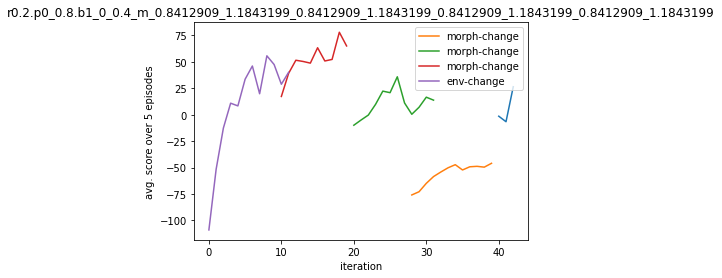

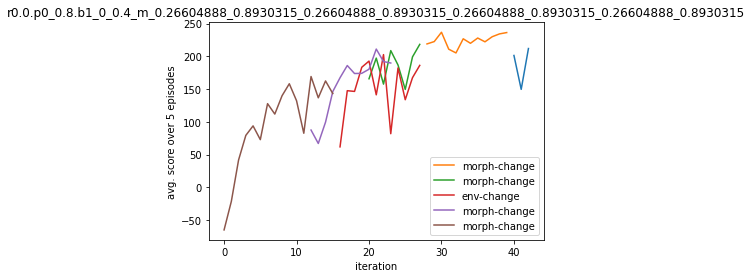

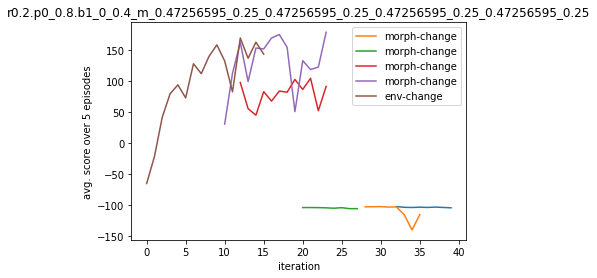

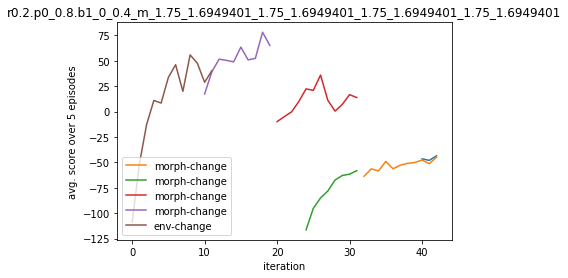

In [6]:
all_parents = [*parent_dict.values()]
for agent in scores:
    if agent not in all_parents:
        plt.plot(scores[agent][0], scores[agent][1])
        parent = parent_dict[agent]
        child = agent
        while parent != -1:
            child_env, child_morph = child.split('_m_')
            parent_env, parent_morph = parent.split('_m_')
            label = []
            if child_morph != parent_morph:
                label.append('morph-change')
            if child_env != parent_env:
                label.append('env-change')
            plt.plot(scores[parent][0], scores[parent][1], label='-'.join(label))
            child = parent
            parent = parent_dict[parent]
        plt.title(agent)
        plt.legend()
        plt.xlabel('iteration')
        plt.ylabel('avg. score over 5 episodes')
        plt.show()